# Linear Regression Basics

The purpose of this notebook is to perform some simple calculations for linear regression. The results of these calculations are used in the blog post [Spring into Linear Regression — Part 2](https://medium.com/datadriveninvestor/spring-into-linear-regression-part-2-da51c22ceb02).

### Preliminaries
Import the necessary moduels

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.stats

### A basic example
Create a table of independent and dependent values. 
Here we start by adding the values to a data dictionary and then convert that to a dataframe. 

In [36]:
data = {'x':[1, 2, 2.5, 3, 4, 5, 5], 'y': [3, 5, 6, 6, 9, 11, 15]}
data_df = pd.DataFrame.from_dict(data)
data_df

,x,y
0,1.0,3
1,2.0,5
2,2.5,6
3,3.0,6
4,4.0,9
5,5.0,11
6,5.0,15


We wnt to display this data in a graph so we define the x and y values for the graph.

In [37]:
x = data_df['x']
y = data_df['y']

We draw the graph.

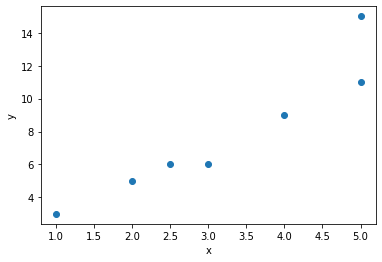

In [38]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='o', label='Data points')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

We plot various lines of fit on the graph.

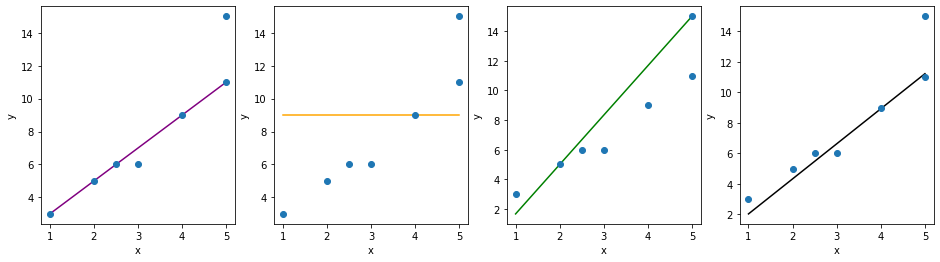

In [39]:
fig, ax = plt.subplots(figsize=(16,4), nrows=1, ncols=4)

ax[0].plot(x, 1 + 2 * x, color='purple')
ax[1].plot(x, 9 + 0 * x, color='orange')
ax[2].plot(x, -5/3 + 10/3 * x, color='green')
ax[3].plot(x, -.27 + 2.3 * x, color='black')



for idx in range(4):
    ax[idx].plot(x, y, linewidth=0, marker='o', label='Data points')
    ax[idx].set_xlabel('x')
    ax[idx].set_ylabel('y')

plt.show()

Next we find the slope and intercept of the bect fit regression line for the above graph. We create a string to print the regression line.

In [40]:
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
slope, intercept

(2.5282051282051285, -0.26923076923077094)

In [41]:
line = f'Regression line: y = {intercept:.2f} + {slope:.2f}x'
line

'Regression line: y = -0.27 + 2.53x'

Finally, we draw the line of best fit.

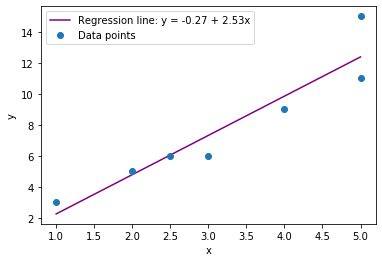

In [42]:

fig, ax = plt.subplots()
ax.plot(x, -.27 + 2.53 * x, label=line, color='purple')
ax.plot(x, y, linewidth=0, marker='o', label='Data points')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()


### An example

Load the data into a dataframe.

In [43]:
df = pd.read_csv("../data/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Drop some columns and redefine the dataframe.

In [44]:
df_temp = df.drop(['sepal_length','sepal_width'], axis=1)
df_temp.head()

,petal_length,petal_width,species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


Define the dependent and independent variables for the graph; calculate the defining characteristics of the best fit line.

In [45]:
x=df_temp['petal_width']
y=df_temp['petal_length']
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
slope, intercept, r

(2.2258853065539115, 1.0905721458773772, 0.9627570970509666)

In [46]:
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

'Regression line: y=1.09+2.23x, r=0.96'

Finally, draw the graph.

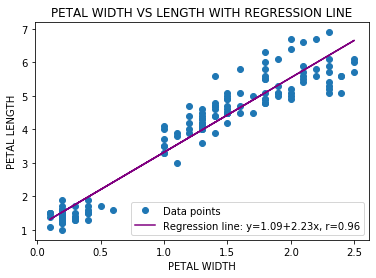

In [47]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='o', label='Data points')
ax.plot(x, intercept + slope * x, label=line, color='purple')
ax.set_xlabel('PETAL WIDTH')
ax.set_ylabel('PETAL LENGTH')
ax.set_title('PETAL WIDTH VS LENGTH WITH REGRESSION LINE')
ax.legend(facecolor='white')
plt.show()